### 在一张画布中画多幅子图的时候使用的是plt.subplots函数绘制均匀状态下的子图
返回元素分别是画布和子图构成的列表，第一个数字为行，第二个为列
- figsize 参数可以指定整个画布的大小
- sharex 和 sharey 分别表示是否共享横轴和纵轴刻度
- tight_layout 函数可以调整子图的相对大小使字符不会重叠

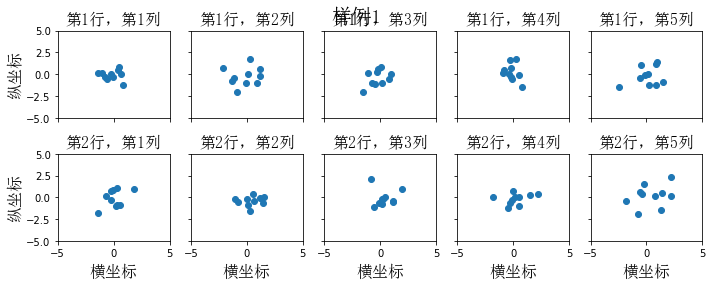

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharex=True, sharey=True)
# 设置土坯那的属性，子图排列为2行5列，整个图片画布大小时（10，4），共享x轴和y轴
fig.suptitle('样例1', size=20,fontdict=dict(family="simsun"))
# 设置的整个图片的标题是样例1，中文字符显示问题也在这里设置
# myfont=font_manager.FontProperties(fname='"C:/Windows/Fonts/simsun.ttc"')
for i in range(2):
#     行和列的循环
    for j in range(5):
        axs[i][j].scatter(np.random.randn(10), np.random.randn(10))
#         绘制的散点图传入的数据为随机数
        axs[i][j].set_title('第%d行，第%d列'%(i+1,j+1),fontdict=dict(fontsize=16,family="simsun"))
#         每幅子图的标题
        axs[i][j].set_xlim(-5,5)
#     x轴的范围
        axs[i][j].set_ylim(-5,5)
#     y轴的范围
        if i==1: axs[i][j].set_xlabel('横坐标',fontdict=dict(fontsize=16,family="simsun"))
#         设置x轴的标签
        if j==0: axs[i][j].set_ylabel('纵坐标',fontdict=dict(fontsize=16,family="simsun"))
#         设置y轴的标签
fig.tight_layout()
# 调整子图使子图不会重叠

### 使用GridSpec绘制非均匀子图
所谓非均匀包含两层含义，
- 第一是指图的比例大小不同但没有跨行或跨列，
- 第二是指图为跨列或跨行状态
- 利用 add_gridspec 可以指定相对宽度比例 width_ratios 和相对高度比例参数 height_ratios

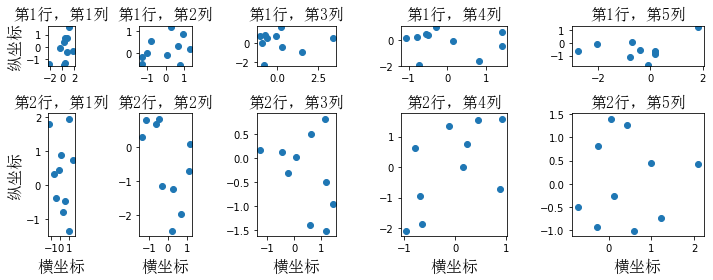

In [13]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=5, width_ratios=[1,2,3,4,5], height_ratios=[1,3])
# fig.suptitle('样例2', size=20,fontdict=dict(fontsize=16,family="simsun"))
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(spec[i, j])
        ax.scatter(np.random.randn(10), np.random.randn(10))
        ax.set_title('第%d行，第%d列'%(i+1,j+1),fontdict=dict(fontsize=16,family="simsun"))
        if i==1: ax.set_xlabel('横坐标',fontdict=dict(fontsize=16,family="simsun"))
        if j==0: ax.set_ylabel('纵坐标',fontdict=dict(fontsize=16,family="simsun"))
fig.tight_layout()

### 子图的拼接

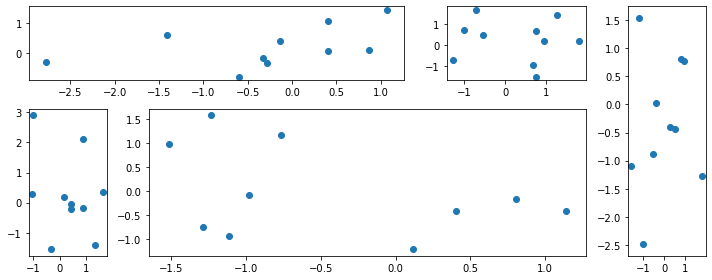

In [15]:
fig = plt.figure(figsize=(10, 4))
spec = fig.add_gridspec(nrows=2, ncols=6, width_ratios=[2,2.5,3,1,1.5,2], height_ratios=[1,2])
# fig.suptitle('样例3', size=20)
# sub1
ax = fig.add_subplot(spec[0, :3])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub2
ax = fig.add_subplot(spec[0, 3:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub3
ax = fig.add_subplot(spec[:, 5])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub4
ax = fig.add_subplot(spec[1, 0])
ax.scatter(np.random.randn(10), np.random.randn(10))
# sub5
ax = fig.add_subplot(spec[1, 1:5])
ax.scatter(np.random.randn(10), np.random.randn(10))
fig.tight_layout()

### 子图上的方法

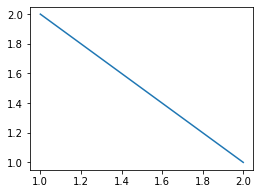

In [16]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot([1,2],[2,1])

(array([  5.,  16.,  44., 124., 223., 240., 192., 109.,  36.,  11.]),
 array([-3.41207281, -2.78318815, -2.1543035 , -1.52541884, -0.89653418,
        -0.26764953,  0.36123513,  0.99011979,  1.61900444,  2.2478891 ,
         2.87677376]),
 <a list of 10 Patch objects>)

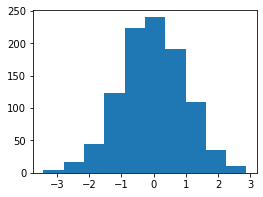

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
ax.hist(np.random.randn(1000))

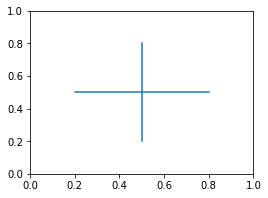

In [21]:

fig, ax = plt.subplots(figsize=(4,3))
ax.axhline(0.5,0.2,0.8)
ax.axvline(0.5,0.2,0.8)
# ax.axline([0.3,0.3],[0.7,0.7])

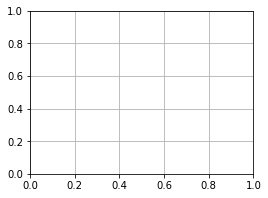

In [22]:
fig, ax = plt.subplots(figsize=(4,3))
ax.grid(True)

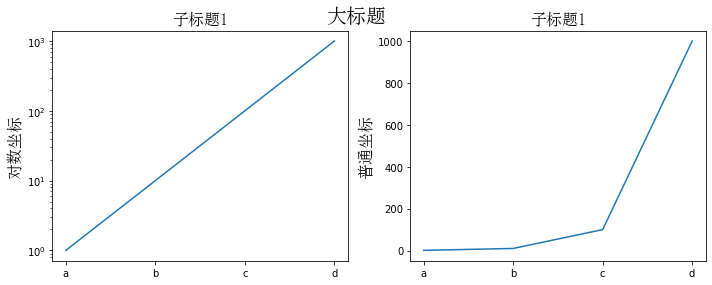

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('大标题', size=20,fontdict=dict(fontsize=16,family="simsun"))
for j in range(2):
    axs[j].plot(list('abcd'), [10**i for i in range(4)])
    if j==0:
        axs[j].set_yscale('log')
        axs[j].set_title('子标题1',fontdict=dict(fontsize=16,family="simsun"))
        axs[j].set_ylabel('对数坐标',fontdict=dict(fontsize=16,family="simsun"))
    else:
        axs[j].set_title('子标题1',fontdict=dict(fontsize=16,family="simsun"))
        axs[j].set_ylabel('普通坐标',fontdict=dict(fontsize=16,family="simsun"))
fig.tight_layout()

#### 与一般的 plt 方法类似， legend, annotate, arrow, text 对象也可以进行相应的绘制

Text(0.8, 0.2, '这是中点')

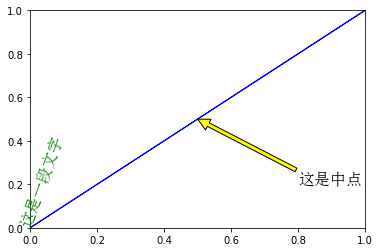

In [27]:
fig, ax = plt.subplots()
ax.arrow(0, 0, 1, 1, head_width=0.03, head_length=0.05, facecolor='red', edgecolor='blue')
ax.text(x=0, y=0,s='这是一段文字', fontsize=16, rotation=70, rotation_mode='anchor', color='green',family='simsun')
ax.annotate('这是中点', xy=(0.5, 0.5), xytext=(0.8, 0.2), arrowprops=dict(facecolor='yellow', edgecolor='black'), fontsize=16,family='simsun')

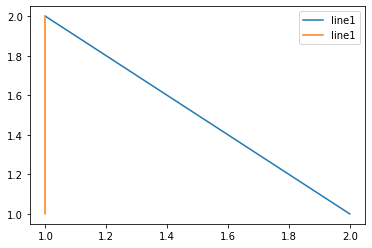

In [28]:
fig, ax = plt.subplots()
ax.plot([1,2],[2,1],label="line1")
ax.plot([1,1],[1,2],label="line1")
ax.legend(loc=1)